<a href="https://colab.research.google.com/github/diegofer616/practico01/blob/main/laboratorio_N4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
input_layer_size  = 14
num_labels = 5
data = pd.read_csv('/content/drive/MyDrive/datasets/Base.csv', delimiter=';')
print(data.shape)

data.info()

(1000000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   income                        1000000 non-null  float64
 1   name_email_similarity         1000000 non-null  float64
 2   prev_address_months_count     1000000 non-null  int64  
 3   current_address_months_count  1000000 non-null  int64  
 4   customer_age                  1000000 non-null  int64  
 5   intended_balcon_amount        1000000 non-null  float64
 6   zip_count_4w                  1000000 non-null  int64  
 7   velocity_6h                   1000000 non-null  float64
 8   velocity_24h                  1000000 non-null  float64
 9   velocity_4w                   1000000 non-null  float64
 10  credit_risk_score             1000000 non-null  int64  
 11  bank_months_count             1000000 non-null  int64  
 12  proposed_credit

In [108]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [109]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [110]:
data

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,bank_months_count,proposed_credit_limit,payment_type
0,3.000000e+00,9.865060e+14,-1,25,40,1.024540e+16,1059,1.309600e+16,7.850960e+15,6.742080e+15,163,9,15000,0
1,8.000000e+00,6.174260e+15,-1,89,20,-8.495510e+15,1658,9.223280e+15,5.745250e+15,5.941660e+16,154,2,15000,3
2,8.000000e+00,9.967070e+15,9,14,40,-1.490390e+16,1095,4.471470e+15,5.471990e+15,5.992560e+15,89,30,2000,1
3,6.000000e+15,4.751000e+15,11,14,30,-1.863100e+16,3483,1.443200e+16,6.755340e+14,5.970340e+15,90,1,2000,1
4,9.000000e+00,8.423070e+15,-1,29,40,4.715250e+16,2339,7.601510e+15,5.124050e+15,5.940730e+15,91,26,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,8.000000e+00,1.246900e+14,-1,143,30,-8.262390e+15,530,6.732600e+15,3.010050e+16,3.095750e+16,305,31,15000,1
999996,9.000000e+00,8.245440e+15,-1,193,30,8.307060e+13,408,1.574290e+16,2.716500e+15,4.286090e+15,235,-1,10000,2
999997,8.000000e+00,1.408910e+15,-1,202,10,5.061000e+16,749,1.258860e+15,3.601320e+16,3.103890e+14,195,31,2000,0
999998,9.000000e+00,2.480240e+13,52,3,30,-1.313390e+16,707,7.048140e+15,6.521400e+16,3.068270e+15,148,1,2000,1


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
def sigmoid(z):

    return 1.0 / (1.0 + np.exp(-z))

In [136]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    grad = grad + (lambda_ / m) * temp

    return J, grad


In [138]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    costs = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        all_theta[c] = res.x
        costs.append(res.fun)

    return all_theta, costs

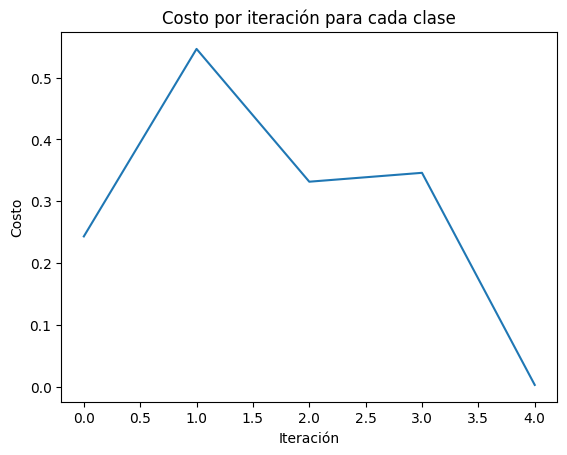

In [139]:
lambda_ = 0.1

all_theta, costs = oneVsAll(X_train, y_train, num_labels, lambda_)
plt.plot(costs)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Costo por iteración para cada clase')
plt.show()


In [140]:
print(all_theta)

[[-1.76398255e+00  2.86049336e-02  3.08306863e-02  2.77226205e-02
   7.21600859e-02 -2.84506355e-02  4.02800233e+00  7.48198605e-03
   6.46568863e-03 -1.38447939e-03 -4.73080600e-03 -1.41224259e-01
   4.15956906e-01  2.08463090e-02]
 [-7.74026259e-01 -9.75836842e-03 -4.46846920e-02 -1.04252134e-01
  -3.97003100e-02  1.10904563e-01 -1.37675892e+00 -6.22369600e-02
  -3.67427307e-03  1.94890383e-02  1.76790821e-03  1.39690098e-01
   6.71544420e-01  3.27567015e-02]
 [-3.94552103e+00 -1.40102078e-02  4.23303575e-02  1.02326061e-01
   6.13825297e-02  2.73630494e-02 -8.12243815e-01  1.02516850e-02
   1.49650273e-03 -2.18257061e-02 -1.29326735e-02 -2.13725245e-02
  -4.21138805e+00 -1.15985425e-01]
 [-2.17395336e+00  6.48663171e-03  3.22428151e-02 -6.84852182e-03
  -2.24477642e-02 -1.80019710e-01 -6.94187332e-01  9.17148539e-02
   1.23187590e-03 -2.14818739e-03  1.88531000e-02 -6.90933187e-02
   3.14028861e-01  1.27510718e-01]
 [-8.24346796e+00  2.21332253e-02 -1.12693849e-01  2.11570115e-01
  

In [141]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    return p

In [142]:
pred = predictOneVsAll(all_theta, X_test)
print(y_test)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(pred == y_test) * 100))


987231    3
79954     0
567130    1
500891    2
55399     1
         ..
90245     0
639296    0
311939    2
324459    1
390499    0
Name: payment_type, Length: 200000, dtype: int64
Precisión de entrenamiento: 71.48 %


In [143]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[47536  2607  1504     0     0]
 [ 4685 47666 21652     2     0]
 [  464  2184 47768     0     0]
 [ 2278 14566  7031     0     0]
 [   25    19    13     0     0]]


<Axes: >

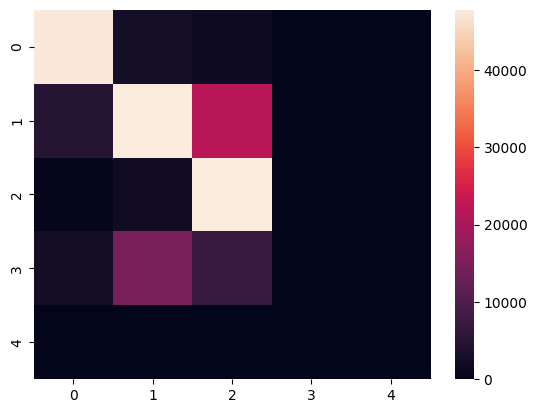

In [144]:
sns.heatmap(cm)